Возьмите датасет [Mortality and Water Hardness](https://www.kaggle.com/ukveteran/mortality-and-water-hardness)

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные

Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
 - Построить точечный график
 - Рассчитать коэффициенты корреляции Пирсона и Спирмена
 - Построить модель линейной регрессии
 - Рассчитать коэффициент детерминации
 - Вывести график остатков

In [1]:
import random
import pandas
import seaborn
from matplotlib import  pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def fetch_water_data_frame() -> pandas.DataFrame:
    data_frame = pandas.read_csv('water.csv')
    data_frame = data_frame.drop('Unnamed: 0', axis=1)
    return data_frame

water_data_frame = fetch_water_data_frame()

In [3]:
water_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


### Построить точечный график

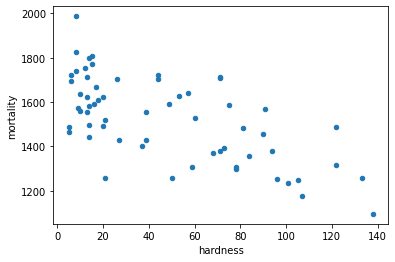

In [4]:
def show_matrix_graph(water_data_frame: pandas.DataFrame):
    water_data_frame.plot(kind='scatter',
                          x='hardness',
                          y='mortality')

show_matrix_graph(water_data_frame)

### Рассчитать коэффициенты корреляции Пирсона и Спирмена

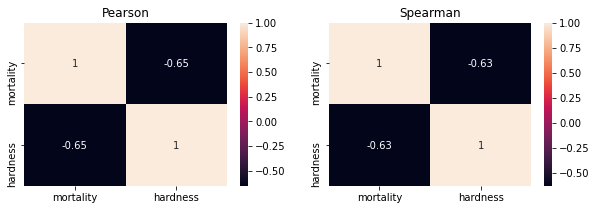

In [5]:
def show_heatmap_matrix_graph(water_data_frame: pandas.DataFrame):
    _, (axes1, axes2) = pyplot.subplots(1, 2, figsize=(10, 3))
    axes1.set_title('Pearson')
    axes2.set_title('Spearman')

    seaborn.heatmap(water_data_frame.corr(),
                    ax=axes1,
                    annot=True)
    seaborn.heatmap(water_data_frame.corr('spearman'),
                    ax=axes2,
                    annot=True)

show_heatmap_matrix_graph(water_data_frame)

### Построить модель линейной регрессии


In [6]:
x_values_train, \
x_values_test, \
y_value_train, \
y_value_test = train_test_split(water_data_frame[['hardness']],
                                water_data_frame['mortality'],
                                test_size=0.3,
                                random_state=404)

linear_regression: LinearRegression = LinearRegression().fit(x_values_train,
                                                             y_value_train)


Linear regression formula: a + b * x = y

a = 1682.8749519263397
b = -3.6406239395516145
x = 46.4346799311231 (example value)

a + b * x = 1513.823744543676


'y' values on test values of 'x'

[1628.26559283 1631.90621677 1293.32819039 1464.43751555 1628.26559283
 1635.54684071 1424.39065222 1500.84375495 1522.68749859 1351.57817343
 1664.67183223 1646.46871253 1631.90621677 1300.60943827 1653.74996041
 1387.98441282 1398.90628464 1424.39065222 1238.7188313 ]



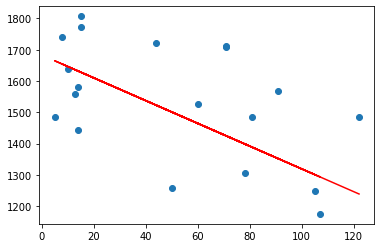

In [7]:
a = linear_regression.intercept_
b = linear_regression.coef_[0]
example_x = random.uniform(0, 150)
y_predict = linear_regression.predict(x_values_test)
print('''
Linear regression formula: a + b * x = y

a = {}
b = {}
x = {} (example value)

a + b * x = {}


'y' values on test values of 'x'

{}
'''.format(a, b, example_x, (a + b * example_x), y_predict))

pyplot.scatter(x_values_test,
                y_value_test)
pyplot.plot(x_values_test,
            linear_regression.predict(x_values_test),
            c='r')

### Рассчитать коэффициент детерминации

In [8]:
linear_regression.score(x_values_test, y_value_test)

0.1469652639268434

### Вывести график остатков

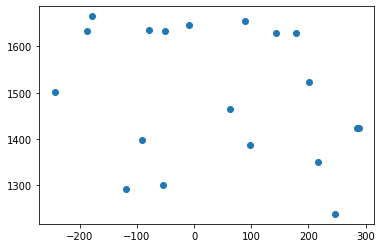

In [9]:
pyplot.scatter(y_value_test - y_predict,
               linear_regression.predict(x_values_test))

Так как коэффициент детерминации 0.14 то можно сказать что данные не связаны.